<a href="https://colab.research.google.com/github/TTawana/Store-Sales/blob/main/Store_sales_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sns.set_style('white')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path ='/content/drive/My Drive/Superstore.xls'
store_df = pd.read_excel(path)
store_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
store_clean = store_df.drop(columns =['Row ID', 'Ship Date', 'Customer ID', 'Product ID', 'Order ID','Customer ID', 'Customer Name', 'Country', 'Postal Code', 'Region', 'Product Name', 'Quantity'], axis ='columns' )

In [ ]:
store_clean.head()

,Order Date,Ship Mode,Segment,City,State,Category,Sub-Category,Sales,Discount,Profit
0,2016-11-08,Second Class,Consumer,Henderson,Kentucky,Furniture,Bookcases,261.9600,0.00,41.9136
1,2016-11-08,Second Class,Consumer,Henderson,Kentucky,Furniture,Chairs,731.9400,0.00,219.5820
2,2016-06-12,Second Class,Corporate,Los Angeles,California,Office Supplies,Labels,14.6200,0.00,6.8714
3,2015-10-11,Standard Class,Consumer,Fort Lauderdale,Florida,Furniture,Tables,957.5775,0.45,-383.0310
4,2015-10-11,Standard Class,Consumer,Fort Lauderdale,Florida,Office Supplies,Storage,22.3680,0.20,2.5164


In [8]:
store_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9994 non-null   datetime64[ns]
 1   Ship Mode     9994 non-null   object        
 2   Segment       9994 non-null   object        
 3   City          9994 non-null   object        
 4   State         9994 non-null   object        
 5   Category      9994 non-null   object        
 6   Sub-Category  9994 non-null   object        
 7   Sales         9994 non-null   float64       
 8   Discount      9994 non-null   float64       
 9   Profit        9994 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 780.9+ KB


In [7]:
store_clean.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896
std,623.245101,0.206452,234.260108
min,0.444000,0.000000,-6599.978000
25%,17.280000,0.000000,1.728750
50%,54.490000,0.200000,8.666500
75%,209.940000,0.200000,29.364000
max,22638.480000,0.800000,8399.976000


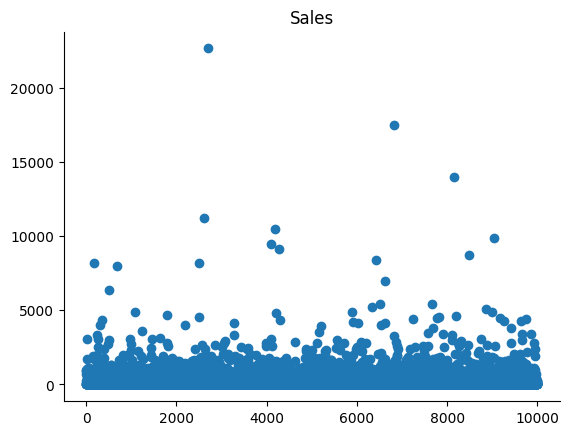

In [18]:
plt.scatter(store_clean.index, store_clean['Sales'])
plt.title('Sales')
sns.despine()

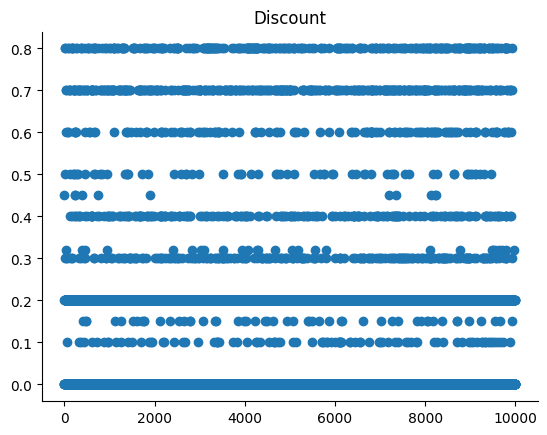

In [19]:
plt.scatter(store_clean.index, store_clean['Discount'])
plt.title('Discount')
sns.despine()

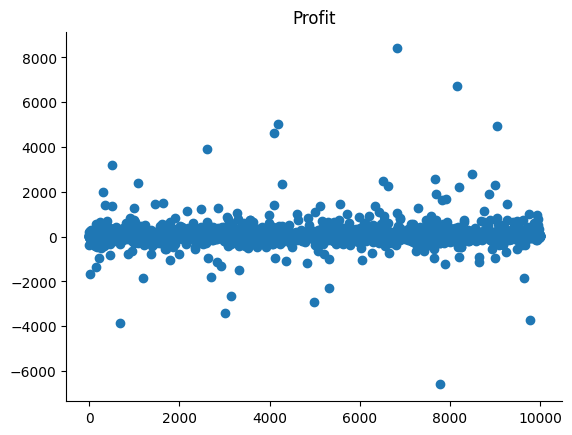

In [20]:
plt.scatter(store_clean.index, store_clean['Profit'])
plt.title('Profit')
sns.despine()

In [11]:
store_clean.describe(include=['object'])

,Ship Mode,Segment,City,State,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994
unique,4,3,531,49,3,17
top,Standard Class,Consumer,New York City,California,Office Supplies,Binders
freq,5968,5191,915,2001,6026,1523


Text(0.5, 1.0, 'Ship Mode')

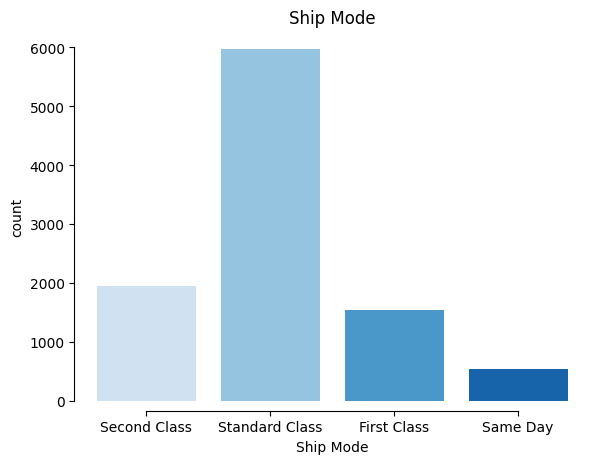

In [21]:
sns.countplot(x='Ship Mode', data=store_clean, saturation=5, palette='Blues')
sns.despine(offset=7, trim=True);
plt.title('Ship Mode')

Text(0.5, 1.0, 'Segment')

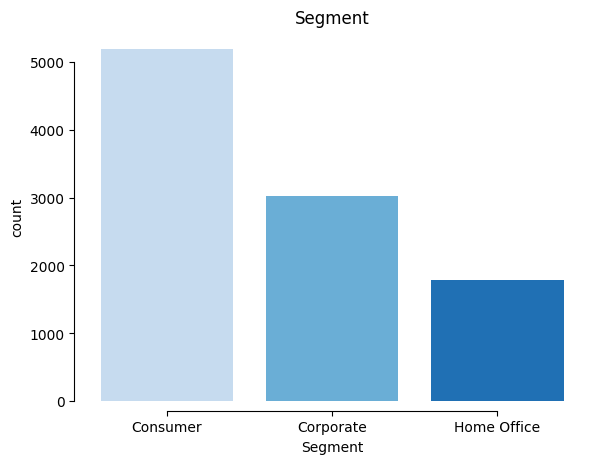

In [22]:
sns.countplot(x='Segment', data=store_clean, saturation=5, palette='Blues')
sns.despine(offset=7, trim=True);
plt.title('Segment')

Text(0.5, 1.0, 'Catergory')

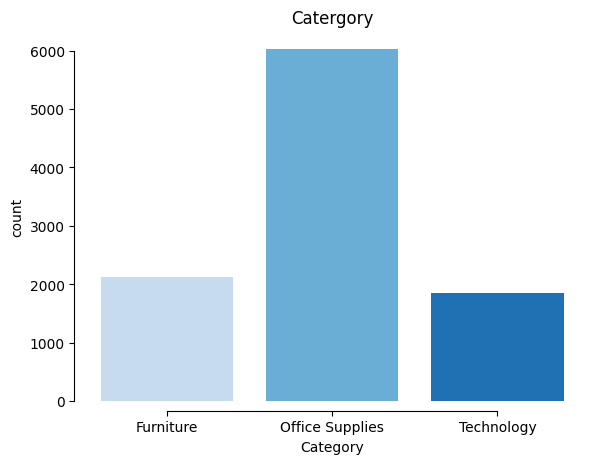

In [23]:
sns.countplot(x='Category', data=store_clean, saturation=5, palette='Blues')
sns.despine(offset=7, trim=True);
plt.title('Catergory')

Text(0.5, 1.0, 'Sub-category')

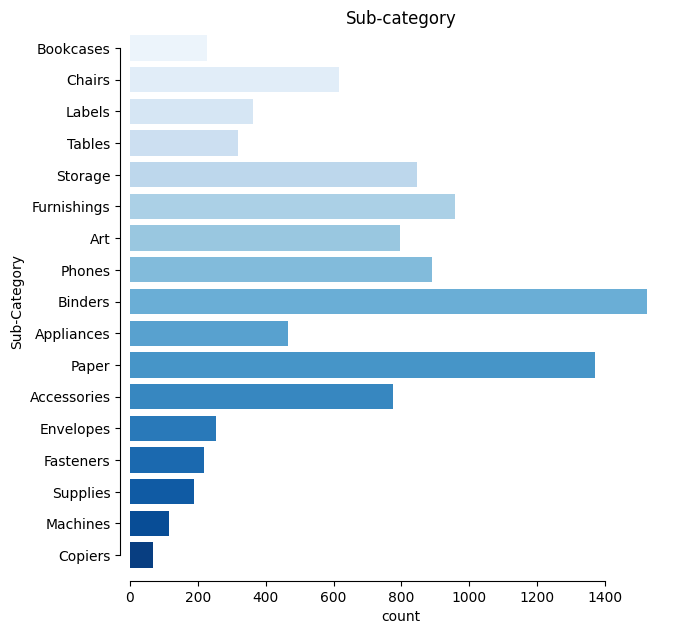

In [24]:
plt.figure(figsize=(7, 7))
sns.countplot(y='Sub-Category', data=store_clean, saturation=5, palette='Blues')
sns.despine(offset=7, trim=True);
plt.title('Sub-category')


In [ ]:
store_clean.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896
std,623.245101,0.206452,234.260108
min,0.444000,0.000000,-6599.978000
25%,17.280000,0.000000,1.728750
50%,54.490000,0.200000,8.666500
75%,209.940000,0.200000,29.364000
max,22638.480000,0.800000,8399.976000


In [ ]:
store_clean.describe(include = ['object'])

,Ship Mode,Segment,City,State,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994
unique,4,3,531,49,3,17
top,Standard Class,Consumer,New York City,California,Office Supplies,Binders
freq,5968,5191,915,2001,6026,1523


In [34]:
store_clean.groupby('Category').Sales.sum().round(2)

Category
Furniture          741999.80
Office Supplies    719047.03
Technology         836154.03
Name: Sales, dtype: float64

In [35]:
store_clean.groupby('Category').Profit.sum().round(2)

Category
Furniture           18451.27
Office Supplies    122490.80
Technology         145454.95
Name: Profit, dtype: float64

In [36]:
store_clean.groupby('Category').Sales.mean().round(2)

Category
Furniture          349.83
Office Supplies    119.32
Technology         452.71
Name: Sales, dtype: float64

In [38]:
store_clean.groupby('Category').Profit.mean().round(2)

Category
Furniture           8.70
Office Supplies    20.33
Technology         78.75
Name: Profit, dtype: float64

In [26]:
store_clean.groupby('Sub-Category').Sales.sum().round(2)

Sub-Category
Accessories    167380.32
Appliances     107532.16
Art             27118.79
Binders        203412.73
Bookcases      114880.00
Chairs         328449.10
Copiers        149528.03
Envelopes       16476.40
Fasteners        3024.28
Furnishings     91705.16
Labels          12486.31
Machines       189238.63
Paper           78479.21
Phones         330007.05
Storage        223843.61
Supplies        46673.54
Tables         206965.53
Name: Sales, dtype: float64

In [28]:
store_clean.groupby('Sub-Category').Profit.sum().round(2)

Sub-Category
Accessories    41936.64
Appliances     18138.01
Art             6527.79
Binders        30221.76
Bookcases      -3472.56
Chairs         26590.17
Copiers        55617.82
Envelopes       6964.18
Fasteners        949.52
Furnishings    13059.14
Labels          5546.25
Machines        3384.76
Paper          34053.57
Phones         44515.73
Storage        21278.83
Supplies       -1189.10
Tables        -17725.48
Name: Profit, dtype: float64

In [27]:
store_clean.groupby('Sub-Category').Sales.mean().round(2)

Sub-Category
Accessories     215.97
Appliances      230.76
Art              34.07
Binders         133.56
Bookcases       503.86
Chairs          532.33
Copiers        2198.94
Envelopes        64.87
Fasteners        13.94
Furnishings      95.83
Labels           34.30
Machines       1645.55
Paper            57.28
Phones          371.21
Storage         264.59
Supplies        245.65
Tables          648.79
Name: Sales, dtype: float64

In [29]:
store_clean.groupby('Sub-Category').Profit.mean().round(2)

Sub-Category
Accessories     54.11
Appliances      38.92
Art              8.20
Binders         19.84
Bookcases      -15.23
Chairs          43.10
Copiers        817.91
Envelopes       27.42
Fasteners        4.38
Furnishings     13.65
Labels          15.24
Machines        29.43
Paper           24.86
Phones          50.07
Storage         25.15
Supplies        -6.26
Tables         -55.57
Name: Profit, dtype: float64

In [30]:
store_clean.groupby('Ship Mode').Sales.mean().round(2)

Ship Mode
First Class       228.50
Same Day          236.40
Second Class      236.09
Standard Class    227.58
Name: Sales, dtype: float64

In [32]:
store_clean.groupby('Ship Mode').Profit.mean().round(2)

Ship Mode
First Class       31.84
Same Day          29.27
Second Class      29.54
Standard Class    27.49
Name: Profit, dtype: float64

In [31]:
store_clean.groupby('Ship Mode').Sales.sum().round(2)

Ship Mode
First Class        351428.42
Same Day           128363.12
Second Class       459193.57
Standard Class    1358215.74
Name: Sales, dtype: float64

In [33]:
store_clean.groupby('Ship Mode').Profit.sum().round(2)

Ship Mode
First Class        48969.84
Same Day           15891.76
Second Class       57446.64
Standard Class    164088.79
Name: Profit, dtype: float64

<ipython-input-25-6d2be78424d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(store_clean.corr(), annot=True, cmap='Blues',)


Text(0.5, 1.0, 'Correlation Heatmap')

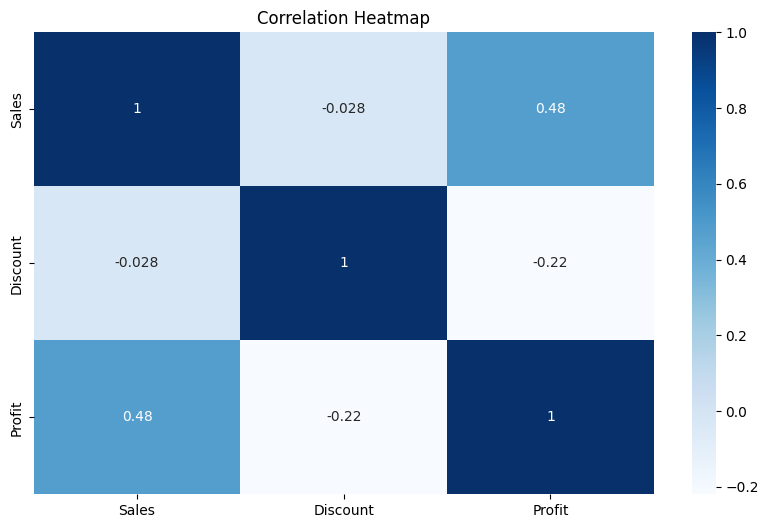

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(store_clean.corr(), annot=True, cmap='Blues',)
plt.title('Correlation Heatmap')


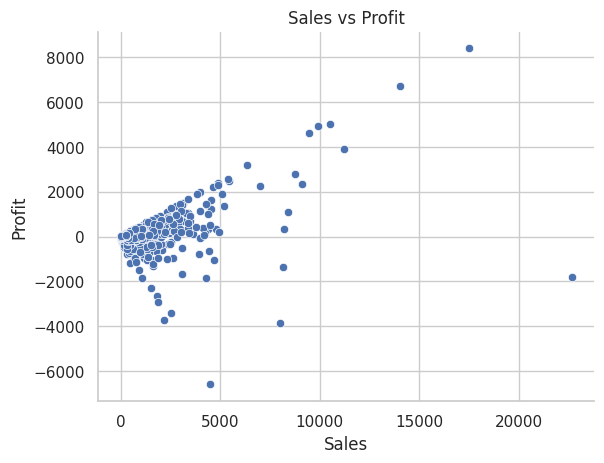

In [ ]:
sns.scatterplot(x=store_clean['Sales'], y=store_clean['Profit'])
plt.title('Sales vs Profit')
sns.despine()